
# Conversion Rate

## Goal: 
1. Build a model to predict conversion rate
2. Make recommendations to improve revenue (product team, marketing team)--increase conversion rate

### Step 1: Load, Investigate and Clean Data

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ggplot import *

In [3]:
#load data into dataframe name conversion
conversion = pd.read_csv(r'C:\Users\lshen\Downloads\conversion_data.csv')

In [4]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [5]:
conversion.dtypes

country                object
age                     int64
new_user                int64
source                 object
total_pages_visited     int64
converted               int64
dtype: object

In [6]:
conversion.shape

(316200, 6)

In [7]:
#check if there is any null value. No null is found.
conversion.isnull().sum()

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

In [8]:
#check if there is any weird/wrong data
conversion.describe()

,age,new_user,total_pages_visited,converted
count,316200.000000,316200.000000,316200.000000,316200.000000
mean,30.569858,0.685465,4.872966,0.032258
std,8.271802,0.464331,3.341104,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,123.000000,1.000000,29.000000,1.000000


In [9]:
conversion.age.unique()

array([ 25,  23,  28,  39,  30,  31,  27,  29,  38,  43,  24,  36,  37,
        33,  20,  35,  17,  50,  22,  18,  34,  19,  42,  32,  21,  48,
        40,  41,  26,  45,  44,  49,  46,  56,  52,  54,  51,  47,  53,
        60,  57,  55,  59,  61,  58,  62,  65,  63,  66,  67,  64,  68,
        69, 123,  70,  73,  77,  72,  79, 111], dtype=int64)

In [10]:
#check what's the data for age > 79. There is only 2 compared with 316200 data points, so remove these two records.
#one action item: might express the issue with software engineer, to check is there is any bug affect data accuracy.
conversion[conversion['age']>79]

,country,age,new_user,source,total_pages_visited,converted
90928,Germany,123,0,Seo,15,1
295581,UK,111,0,Ads,10,1


In [11]:
#remove, and check
conversion = conversion[conversion['age']<80]
conversion.shape

(316198, 6)

### Step2: Data Exploration and Analysis

In [25]:
conversion['converted'].value_counts()

0    306000
1     10198
Name: converted, dtype: int64

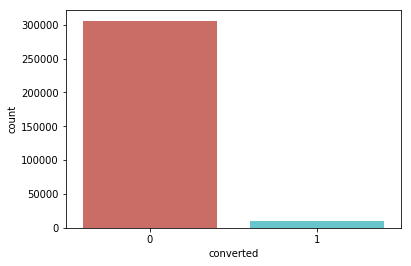

In [29]:
sns.countplot(x='converted',data=conversion, palette='hls')

In [31]:
conversion.groupby('converted').mean()

,age,new_user,total_pages_visited
converted,,,
0,30.703961,0.698382,4.550281
1,26.529025,0.298000,14.553932


In [12]:
data_country = conversion.groupby('country').converted.mean()

In [17]:
data_country

country
China      0.001332
Germany    0.062428
UK         0.052612
US         0.037801
Name: converted, dtype: float64

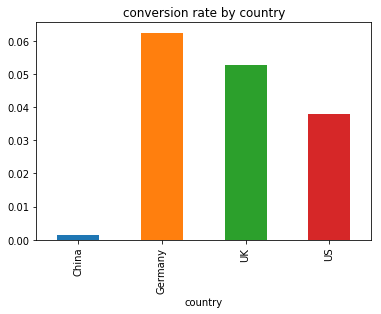

In [32]:
#use pandas dataframe function to visulaize, get a sense of the data and have some observations

#China converts extreamly low
data_country.plot(title = 'conversion rate by country',kind = 'bar')

In [76]:
data_age = conversion.groupby('age').converted.mean()

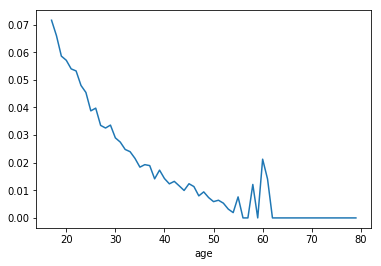

In [77]:
data_age.plot()

In [83]:
data_user = conversion.groupby('new_user').converted.mean()

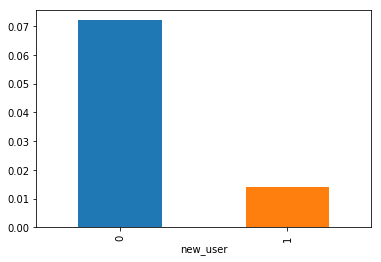

In [80]:
data_user.plot(kind = 'bar')

In [84]:
pd.crosstab(conversion['converted'],conversion['new_user'])

new_user,0,1
converted,,
0,92295,213705
1,7159,3039


In [81]:
data_source = conversion.groupby('source').converted.mean()

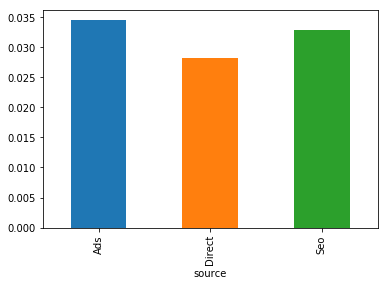

In [82]:
data_source.plot(kind='bar')

In [20]:
data_page = conversion.groupby('total_pages_visited').converted.mean()

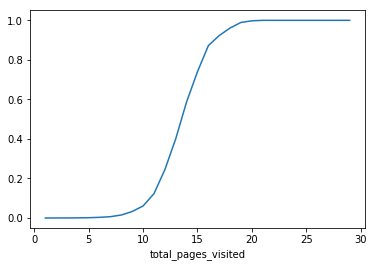

In [33]:
#spend more time, higher probability of conversion
data_page.plot()

#### Create dummy variables for categorical columns

In [85]:
#create k-1 dummy variables
#in this case, use China, ads as baseline
country_dummies = pd.get_dummies(conversion.country, prefix='country').iloc[:,1:]

In [40]:
country_dummies.head()

,country_Germany,country_UK,country_US
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,0
4,0,0,1


In [41]:
source_dummies = pd.get_dummies(conversion.source,prefix='source').iloc[:,1:]

In [43]:
source_dummies.head()

,source_Direct,source_Seo
0,0,0
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
conversion = pd.concat([conversion,country_dummies,source_dummies],axis=1 )

In [45]:
conversion.head()

,country,age,new_user,source,total_pages_visited,converted,country_Germany,country_UK,country_US,source_Direct,source_Seo
0,UK,25,1,Ads,1,0,0,1,0,0,0
1,US,23,1,Seo,5,0,0,0,1,0,1
2,US,28,1,Seo,4,0,0,0,1,0,1
3,China,39,1,Seo,5,0,0,0,0,0,1
4,US,30,1,Seo,6,0,0,0,1,0,1


In [48]:
conversion.columns.values

array(['country', 'age', 'new_user', 'source', 'total_pages_visited',
       'converted', 'country_Germany', 'country_UK', 'country_US',
       'source_Direct', 'source_Seo'], dtype=object)

In [63]:
#define feature and response variables.
feature_cols = ['country_Germany', 'country_UK', 'country_US','age', 'new_user','source_Direct', 'source_Seo']
X = conversion[feature_cols]
y = conversion['converted']

In [64]:
print (X.shape)
print (y.shape)

(316198, 7)
(316198,)


#### Feature Selection

Recursive Feature Elimination (RFE) is based on the idea to repeatedly construct a model and choose either the best or worst performing feature, setting the feature aside and then repeating the process with the rest of the features. This process is applied until all features in the dataset are exhaustmed. The goal of RFE is to select features by recursively considering smaller and smaller sets of features.

In [92]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

#a workaround to solve result.summary() error
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)

In [90]:
#Instantiate the estimator - create an instance of LogisticRegression model
logreg = LogisticRegression()

#the numeric values means how many features to select, but how do we decide the number?
rfe = RFE(logreg,8)
rfe = rfe.fit(X,y)
print (rfe.support_)
print (rfe.ranking_)
#selected features rank 1

[ True  True  True  True  True  True  True]
[1 1 1 1 1 1 1]


In [93]:
#statistics & econometrics package with useful tools for parameter estimation & statistical testing
import statsmodels.api as sm
logit_model = sm.Logit(y,X)
#fit the model
result = logit_model.fit()
print (result.summary())

#the P values for all the variables are smaller than 0.05, therefore, most of them are significant to the model

Optimization terminated successfully.
         Current function value: 0.123163
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               316198
Model:                          Logit   Df Residuals:                   316191
Method:                           MLE   Df Model:                            6
Date:                Tue, 06 Mar 2018   Pseudo R-squ.:                  0.1356
Time:                        14:19:59   Log-Likelihood:                -38944.
converged:                       True   LL-Null:                       -45053.
                                        LLR p-value:                     0.000
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
country_Germany     1.7682      0.047     37.345      0.000       1.675       1.861
country_UK    

### Step 3: Build Model to Predict Conversion Rate - Machine Learning

This is a supervised learning - classification problem. Following models might be used.
1. Logistic regression
2. Decision trees
3. RuleFit(often the best choice)
4. Random forest in combination with partial dependence plots

Pick one you know the best, and the reason why pick it. If have more time, can try other models/different parameters.

### 3.1 Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes, success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.

Logistic Regression Assumptions

-Binary logistic regression requires the dependent variable to be binary.<br>
-For a binary regression, the factor level 1 of the dependent variable should represent the desired outcome.<br>
-Only the meaningful variables should be included.<br>
-The independent variables should be independent of each other. That is, the model should have little or no multicollinearity.<br>
-The independent variables are linearly related to the log odds.<br>
-Logistic regression requires quite large sample sizes.<br>
-Keeping the above assumptions in mind, let’s look at our dataset.

#### Model Fitting

In [94]:
#import model
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state=0)

In [97]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(221338, 7) (94860, 7) (221338,) (94860,)


In [99]:
#instantiate, fit model
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [101]:
#predict the test set
y_pred = logreg.predict(X_test)

In [103]:
#Accuracy of logistic regression classifier on test set
logreg.score(X_test,y_test)

0.9682268606367278

#### Cross Validation

Cross validation attempts to avoid overfitting while still producing a prediction for each observation dataset. We are using 10-fold Cross-Validation to train our Logistic Regression model.

In [105]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits = 10, random_state=7)
modelCV = LogisticRegression()
scoring = "accuracy"
results = model_selection.cross_val_score(modelCV, X_train,y_train,cv=kfold,scoring = scoring)
print ('10-fold cross validation average accuracy: {}'.format(results.mean()))

10-fold cross validation average accuracy: 0.9675428521442025


The average accuracy remains very close to the Logistic Regression model accuracy; hence, we can conclude that our model generalizes well.

#### Confusion Matrix

In [107]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print (confusion_matrix)

[[91846     0]
 [ 3014     0]]


91846 correct predictions and 3014 incorrect predictions

#### Compute precision, recall, F-measure and support

precision: is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier to not label a sample as positive if it is negative.

recall: is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

F-measure: The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.<br>
The F-beta score weights the recall more than the precision by a factor of beta. beta = 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

In [109]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.97      1.00      0.98     91846
          1       0.00      0.00      0.00      3014

avg / total       0.94      0.97      0.95     94860



C:\Users\lshen\AppData\Local\Continuum\anaconda3\envs\py34\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


#### ROC Curve

In [110]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

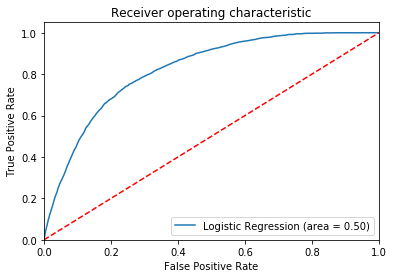

In [112]:
logit_roc_auc = roc_auc_score(y_test,y_pred)
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")